In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
data = np.transpose(np.loadtxt('vaporisation.csv', delimiter = ','))

In [3]:
p = data[0]
t = data[1]
lnp = np.log(p)
tinv = [1/x for x in t]

In [4]:
#defining useful function to do least-square fitting
def delta(x):
    return len(x)*sum(i*i for i in x)-(sum(x))**2
def intercept(x,y,delta):
    return ((sum(i*i for i in x))*sum(y)-sum(x)*sum(map(lambda a,b:a*b,x,y)))/delta
def slope(x,y,delta):
    return (len(x)*sum(map(lambda a,b:a*b,x,y))-sum(x)*sum(y))/delta
def acu(x,y,m,c):
    return np.sqrt((1/(len(x)-2))*sum(map(lambda a,b:(b-m*a-c)**2, x,y)))
def am(acu,x,delta):
    return acu*np.sqrt(len(x)/delta)
def ac(acu,x,delta):
    return acu*np.sqrt(sum(i*i for i in x)/delta)

In [5]:
#calculating parameters and their errors
dx = delta(tinv)
m = slope(tinv,lnp,dx)
print('slope:',m)
c = intercept(tinv,lnp,dx)
print('intercept:',c)
cu=acu(tinv,lnp,m,c)
merr=am(cu,tinv,dx)
print('error in gradient:',merr)
cerr=ac(cu,tinv,dx)
print('error in the intercept:',cerr)

lin = np.linspace(tinv[0],tinv[-1],10)
fit = np.polyval([m,c], tinv)
fitlin = np.polyval([m,c], lin)
res = lnp - fit

slope: -5057.339801343919
intercept: 17.894413335408082
error in gradient: 9.494149680691645
error in the intercept: 0.026831771894737472


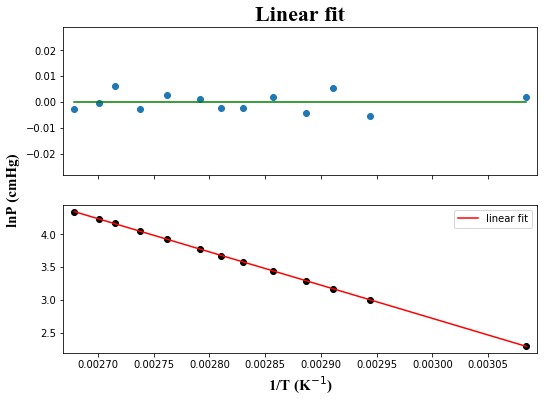

In [11]:
f, ax = plt.subplots(2, figsize = (8.5,6), sharex = True,)
f.add_subplot(111, frameon = False)
plt.tick_params(labelcolor = 'none', bottom = False, left = False)
ax[1].set_xlim([tinv[-1]-0.00001,tinv[0]+0.00001])
plt.xlabel('1/T (K$^{-1}$)', fontname = 'Times New Roman', fontsize = 15)
plt.ylabel('lnP (cmHg)', fontname = 'Times New Roman', fontsize = 15, labelpad = 20)
plt.title('lnP ', fontname = 'Times New Roman', fontsize = '22')

ax[0].scatter(tinv, res)
ax[0].plot(lin, 10*[0], 'g')

ax[1].plot(tinv, lnp, 'ko')
ax[1].plot(lin, fitlin, 'r', label = "Best fit")

ax[1].legend()
plt.savefig('data.png')
plt.show()

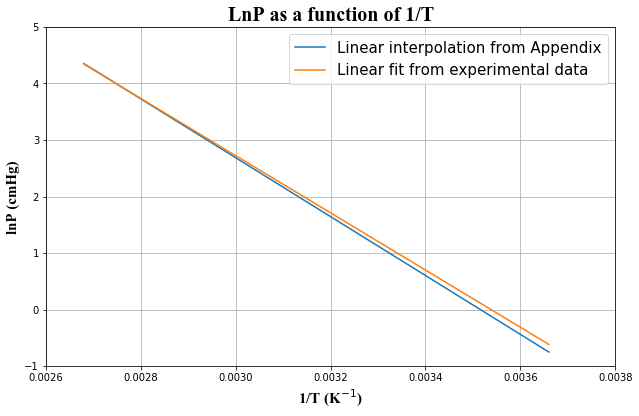

In [8]:
longer = np.polyval([m,c], np.linspace(0.00268,0.00366,100))
plt.figure(figsize = (10.2,6.24))
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = eval(formula)
    plt.plot(x, y,label = 'Linear interpolation from Appendix')  
graph('-5205*x+18.3',np.linspace(0.00268,0.00366,100))

plt.xlim([0.0026,0.0038])
plt.ylim([-1,5])

plt.plot(np.linspace(0.00268,0.00366,100),longer,label = 'Linear fit from experimental data')
#plt.plot(tinv, lnp, 'ro',markersize = 5, label = 'Data points')
plt.xlabel('1/T (K$^{-1}$)',fontname = 'Times New Roman', fontsize = '15')
plt.ylabel('lnP (cmHg)',fontname = 'Times New Roman', fontsize = '15')
plt.title ('LnP as a function of 1/T',fontname = 'Times New Roman', fontsize = '20')
plt.legend(loc=1, prop = {'size' : 15})
plt.grid()
plt.savefig('fit.png')
plt.show()

In [9]:
tripoint = np.e**(m*(1/273.15) + c)
err_tripoint = np.sqrt(((1/273.15)*np.e**(tripoint))**2*merr**2+(np.e**(tripoint))**2*cerr**2)
print (tripoint,err_tripoint)
print ("The tripoint pressure estimated through linear regression is:",0.54,'±',0.08,"cmHg.")

0.5376928082294506 0.07517572680271432
The tripoint pressure estimated through linear regression is: 0.54 ± 0.08 cmHg.


In [10]:
L = m*(-8.314)
err_L = 8.314 * merr
print (L,err_L)
print ("L calculated from linear regression is:",42.05,'±',0.08,"kJ.")

42046.72310837334 78.93436044527034
L calculated from linear regression is: 42.05 ± 0.08 kJ.
